# Assignment 2

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Read and merge the dataset into single dataframe

In [31]:
ign = pd.read_csv("./ign/ign.csv", index_col="id")
ign_score = pd.read_csv("./ign/ign_score.csv", index_col="id")
# ign_new = pd.concat([ign, ign_score], axis=1)
# ign_new = pd.merge(ign, ign_score, left_index=True, right_index=True)
ign_new = ign.join(ign_score)

### 2. Provide the names of 10 movies rated highest.

In [32]:
score_sorted = ign_new.sort_values(by="score", ascending=False)
print(score_sorted["title"].unique()[:10])

['Inside' 'Super Mario Bros. Deluxe' 'Metal Gear Solid V: The Phantom Pain'
 'Mario Golf [Game Boy Color]' 'Shanghai'
 'Grand Theft Auto IV (Special Edition)' 'Undertale' 'Grand Theft Auto IV'
 'Metal Gear Solid 4: Guns of the Patriots' 'Checkered Flag']


### 3. Rank the movie names by their highest average rating scores.

In [33]:
score_average = ign_new.groupby('title')['score'].transform('mean')
score_rank = score_average.rank(method ='dense', ascending=False)
ign_new = ign_new.assign(Rank=score_rank)
ign_new

,url,genre,editors_choice,release_year,release_month,release_day,score_phrase,title,platform,score,Rank
id,,,,,,,,,,,
0,/games/littlebigplanet-vita/vita-98907,Platformer,Y,2012,9,12,Amazing,LittleBigPlanet PS Vita,PlayStation Vita,9.0,37.0
1,/games/littlebigplanet-ps-vita-marvel-super-he...,Platformer,Y,2012,9,12,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,37.0
2,/games/splice/ipad-141070,Puzzle,N,2012,9,12,Great,Splice: Tree of Life,iPad,8.5,80.0
3,/games/nhl-13/xbox-360-128182,Sports,N,2012,9,11,Great,NHL 13,Xbox 360,8.5,80.0
4,/games/nhl-13/ps3-128181,Sports,N,2012,9,11,Great,NHL 13,PlayStation 3,8.5,80.0
5,/games/total-war-battles-shogun/mac-142565,Strategy,N,2012,9,11,Good,Total War Battles: Shogun,Macintosh,7.0,266.0
6,/games/double-dragon-neon/xbox-360-131320,Fighting,N,2012,9,11,Awful,Double Dragon: Neon,Xbox 360,3.0,548.0
7,/games/guild-wars-2/pc-896298,RPG,Y,2012,9,11,Amazing,Guild Wars 2,PC,9.0,37.0
8,/games/double-dragon-neon/ps3-131321,Fighting,N,2012,9,11,Awful,Double Dragon: Neon,PlayStation 3,3.0,548.0


### 4. Plot movie scores across each genre.

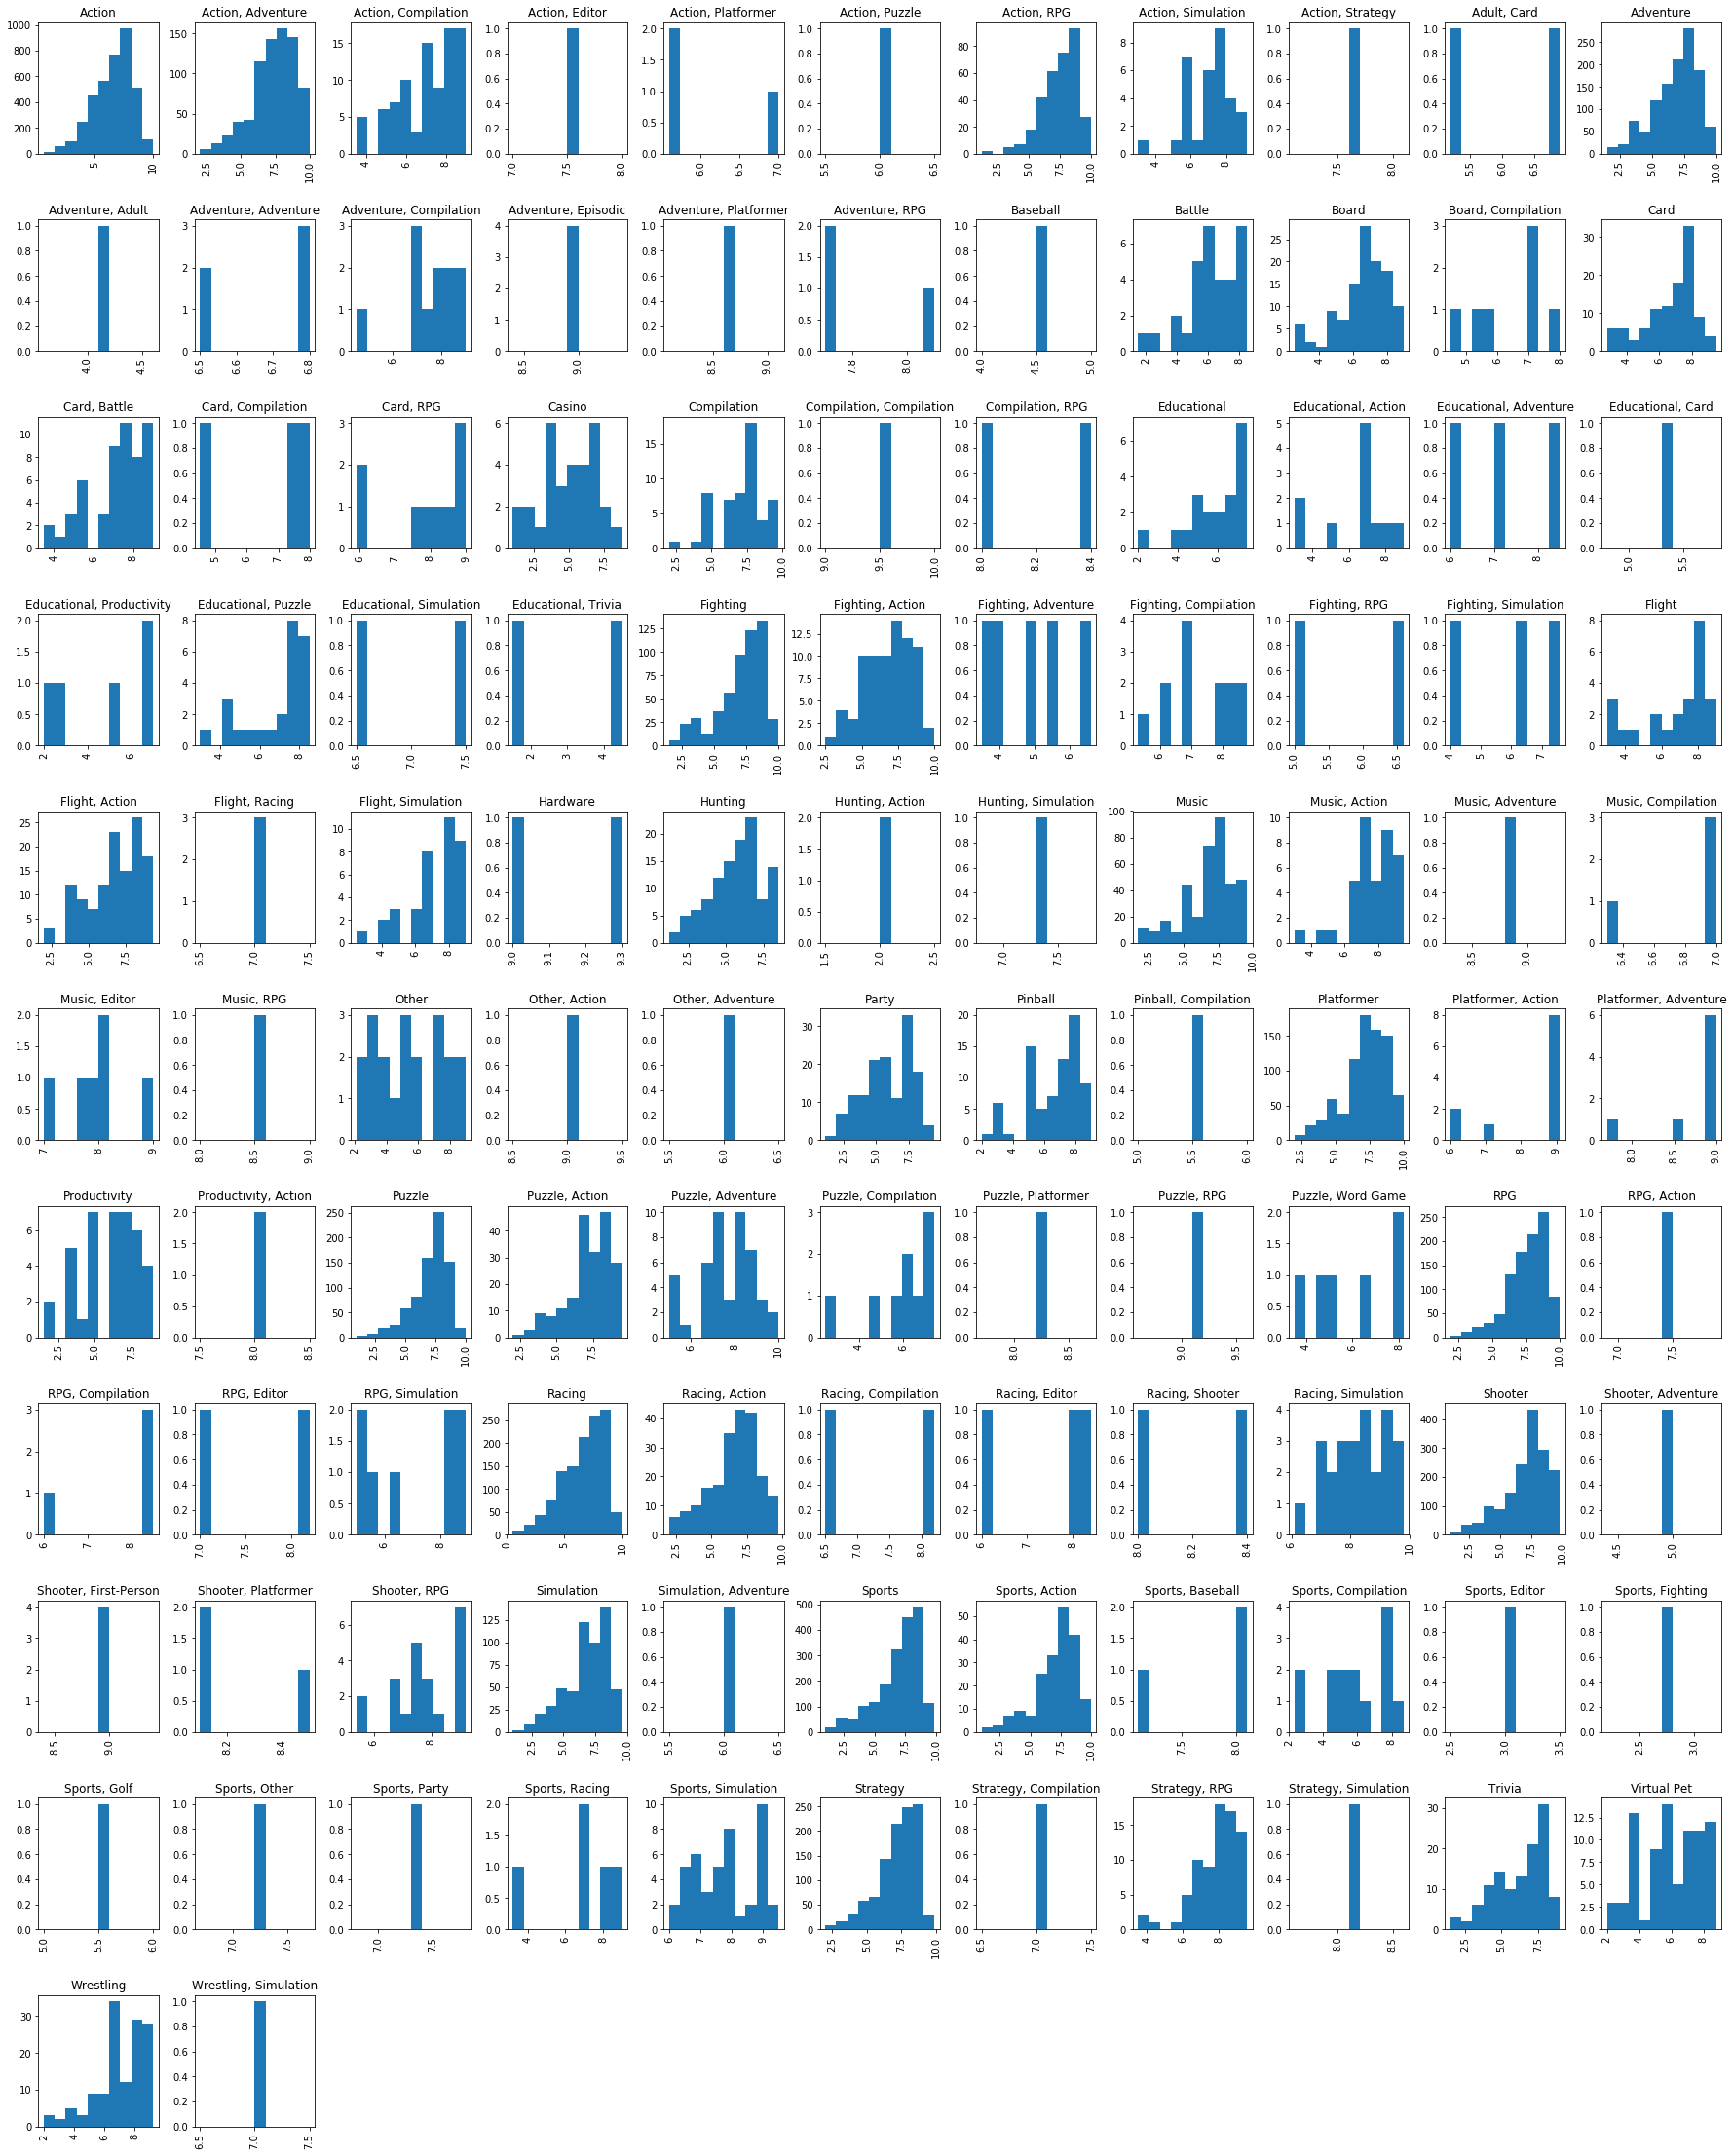

In [37]:
ign_new.hist(by="genre", column="score", figsize=(30,40),grid =True)
plt.show()

### 5. Find the group that provides the highest average movie ratings when split into genre groups.

In [35]:
# genre_means = ign_new[['genre','score']].groupby('genre').mean()
score_average = ign_new.groupby('genre')[['score']].mean()
sorted_score = score_average.sort_values(by='score',ascending=False)
print(sorted_score.head(1).index.values)

['Compilation, Compilation']


### 6. Provide a table with the average rating of a movie by each genre group along with the movie title.

In [36]:
table = pd.pivot_table(ign_new, values='score', index=['genre', 'title'])
table

score
genre                 title                                                     
Action                'Splosion Man                                     9.000000
                      007 Legends                                       4.400000
                      007: The World is Not Enough                      6.900000
                      007: Tomorrow Never Dies                          5.000000
                      1001 BlockBusters                                 7.000000
                      102 Dalmatians: Puppies to the Rescue             6.500000
                      24: Agent Down                                    8.000000
                      24: Special Ops                                   7.600000
                      24: The Game                                      6.600000
                      3-2-1 Rattle Battle                               4.500000
                      3-D Vector Pong                                   6.000000
                      300                                               8.000000
                      300: March to Glory                               5.700000
                      50 Cent: Blood on the Sand                        7.100000
                      50 Cent: Bulletproof                              6.500000
                      50 Cent: Bulletproof G Unit Edition               5.000000
                      911 Fire Rescue                                   5.500000
                      99Bullets                                         8.000000
                      A Bug's Life                                      3.000000
                      A Collection of Intellivision Classic Games       4.000000
                      A Sound of Thunder                                7.500000
                      A Topsy Turvy Life: The Turvys Strike Back        8.000000
                      A Topsy Turvy Life: Turvy Drops                   7.000000
                      A.D.D.                                            7.500000
                      A.P.B.                                            8.500000
                      APB                                               7.700000
                      Absolute BrickBuster                              7.000000
                      Abyss Odyssey                                     6.700000
                      Ace Combat 3: Electrosphere                       9.000000
                      Aces of the Galaxy                                7.950000
...                                                                          ...
Wrestling             WWE Raw 2                                         9.100000
                      WWE Road to WrestleMania X8                       7.000000
                      WWE SmackDown vs. Raw 2006                        8.950000
                      WWE SmackDown vs. Raw 2007                        7.933333
                      WWE SmackDown vs. Raw 2008                        6.728571
                      WWE SmackDown vs. Raw 2008 (Special Edition)      7.500000
                      WWE SmackDown vs. Raw 2009                        7.416667
                      WWE SmackDown vs. Raw 2009 (Collector's Edition)  7.800000
                      WWE SmackDown vs. Raw 2010                        7.228571
                      WWE SmackDown vs. Raw 2011                        7.875000
                      WWE SmackDown!                                    7.500000
                      WWE SmackDown! Here Comes the Pain                9.100000
                      WWE SmackDown! Shut Your Mouth                    8.200000
                      WWE SmackDown! vs. Raw                            8.400000
                      WWE Survivor Series                               6.000000
                      WWE WrestleMania 21                               6.000000
                      WWE WrestleMania X8                               7.000000
                      WWE